In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot

In [ ]:
stock = "NVDA"
ticker = yf.Ticker(stock)
data = ticker.history(start = "2013-01-01", end = "2023-12-31", interval = "1mo")["Close"]
data.head()

,Close
Date,
2013-01-01 00:00:00-05:00,0.282944
2013-02-01 00:00:00-05:00,0.292175
2013-03-01 00:00:00-05:00,0.297915
2013-04-01 00:00:00-04:00,0.319742
2013-05-01 00:00:00-04:00,0.335996


Text(0.5, 1.0, 'Nvidia')

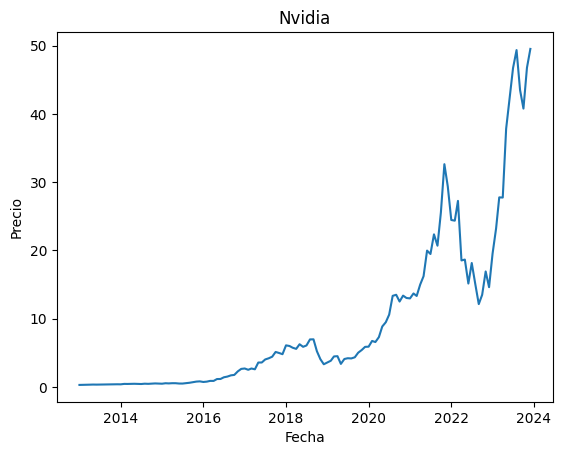

In [ ]:
sns.lineplot(data = data)
plt.ylabel("Precio")
plt.xlabel("Fecha")
plt.title("Nvidia")

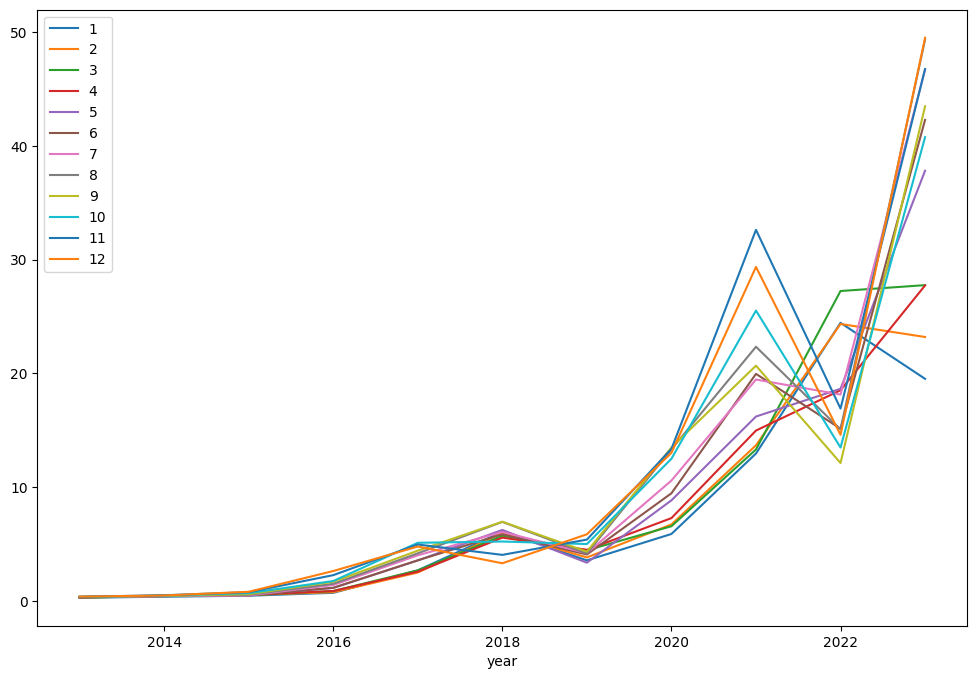

In [ ]:
# Crear columnas de año y mes
data = data.reset_index()
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

# Tabla pivote por año y mes
piv_year_month_nvidia = pd.pivot_table(data, values='Close', index='year', columns='month')
piv_year_month_nvidia.plot(figsize=(12,8))
plt.legend(pd.unique(data['month']))
plt.show()

<Axes: xlabel='month'>

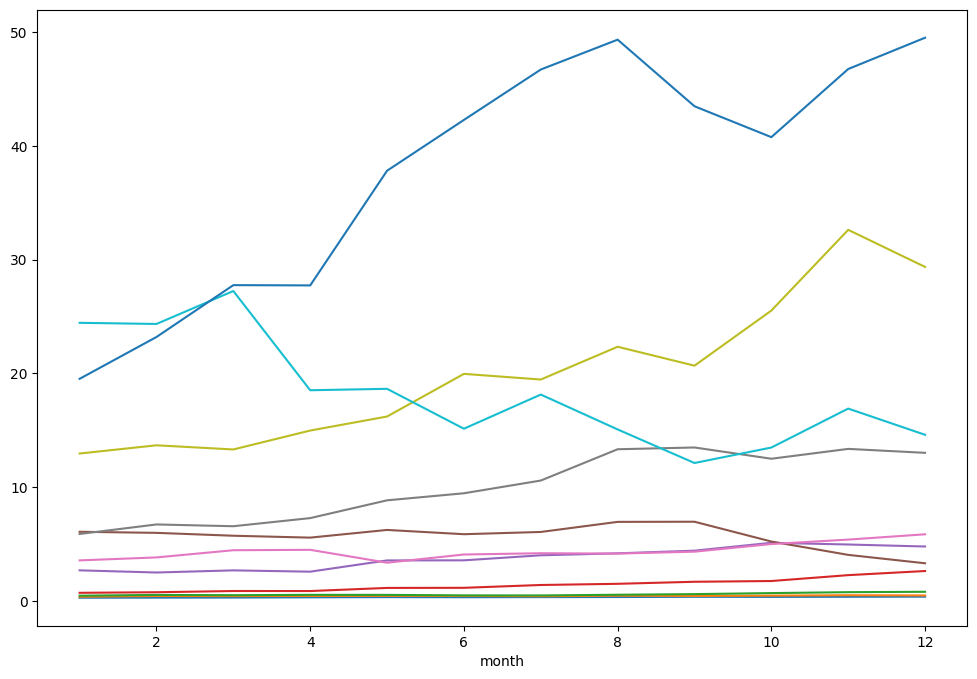

In [ ]:
    piv = pd.pivot_table(data,index='month', columns='year',  values = "Close" )
    piv.plot(figsize=(12,8), legend = False)

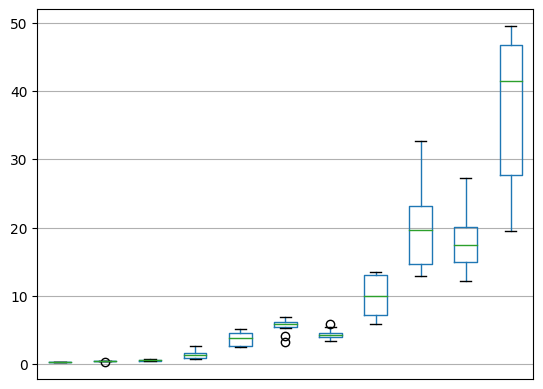

In [ ]:
piv_month_year_nvidia.boxplot()
plt.xticks([])
plt.show()

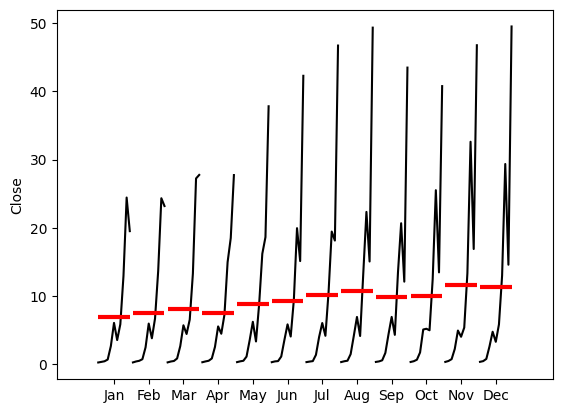

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

# Convert 'month' column to datetime with day and year information
data.index = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str), format='%Y-%m')

month_plot(data['Close'], ylabel="Close")
plt.show()

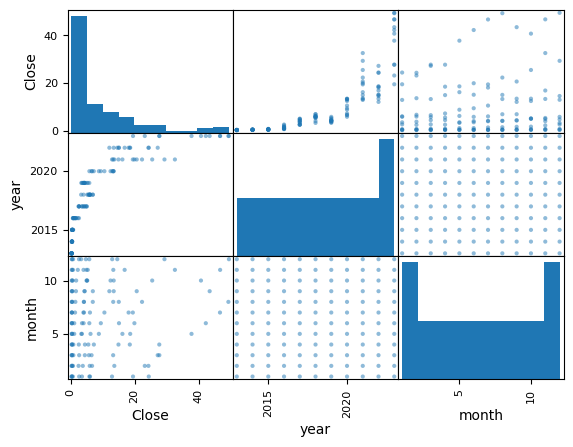

In [ ]:
pd.plotting.scatter_matrix(data)
plt.show()

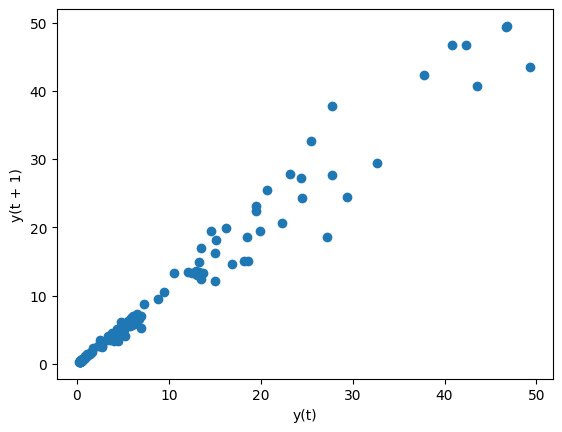

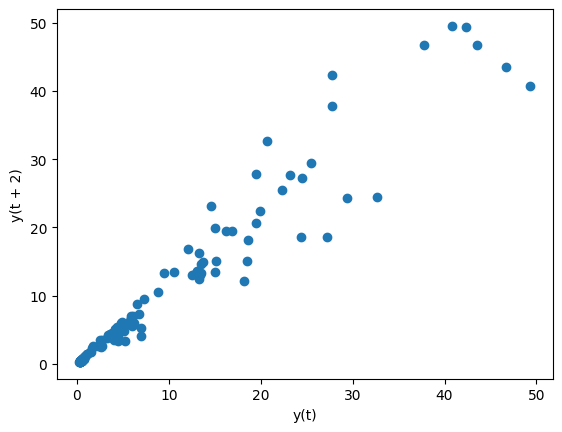

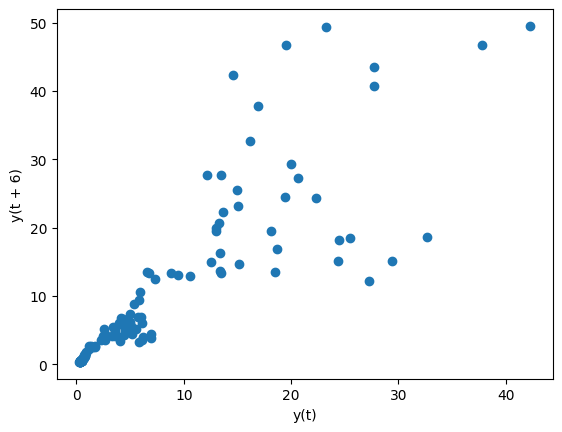

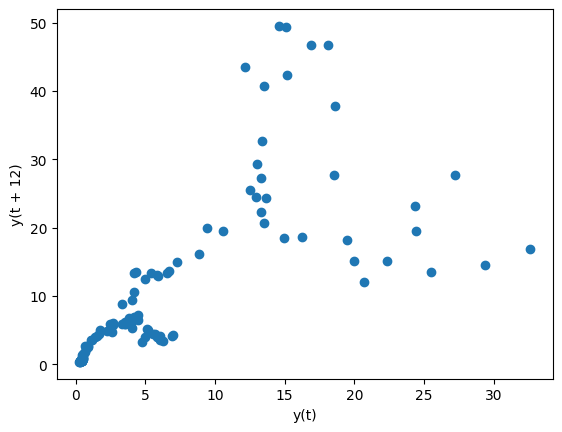

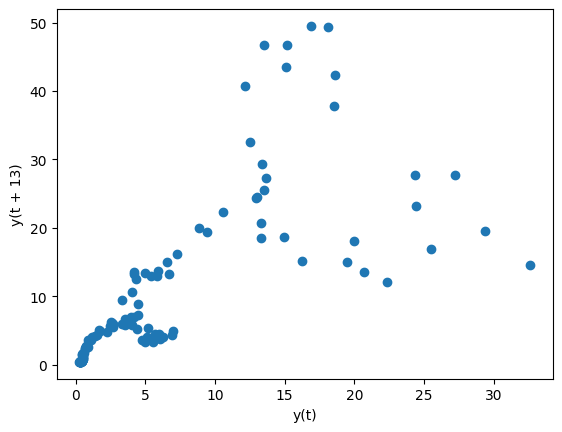

In [ ]:
for lag in [1, 2, 6, 12, 13]:
    lag_plot(data['Close'], lag=lag)
    plt.show()

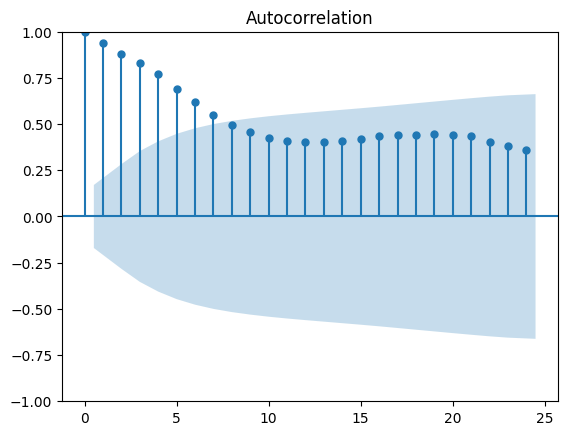

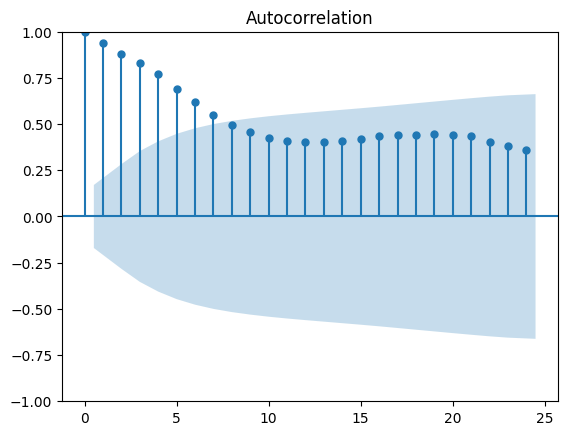

In [ ]:

plot_acf(data['Close'], lags=24) # Select the 'Close' column from the DataFrame.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Close' is the column you want to decompose and it has a DateTimeIndex
result = seasonal_decompose(data['Close'], model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
              ..
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
Name: trend, Length: 132, dtype: float64
2013-01-01   -0.343082
2013-02-01   -0.210870
2013-03-01    0.162367
2013-04-01   -0.842854
2013-05-01    0.177344
                ...   
2023-08-01    0.286090
2023-09-01   -0.304930
2023-10-01   -0.032504
2023-11-01    0.806527
2023-12-01   -0.121367
Name: seasonal, Length: 132, dtype: float64
2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
              ..
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
Name: resid, Length: 132, dtype: float64
2013-01-01     0.282944
2013-02-01     0.292175
2013-03-01     0.297915
2013-04-01     0.319742
2013-05-01     0.335996
                ...    
2023-08-01    49.340225
2023-09-01    43.485981
2023-10-01    40.771152
2023-11-01    46.759853
2023-12

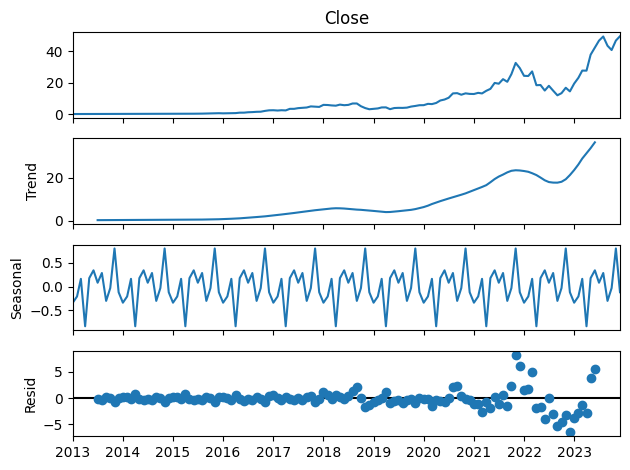

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

# Specify the column you want to decompose ('Close' in this example)
result = seasonal_decompose(data['Close'], model='additive')
result.plot()
pyplot.show()

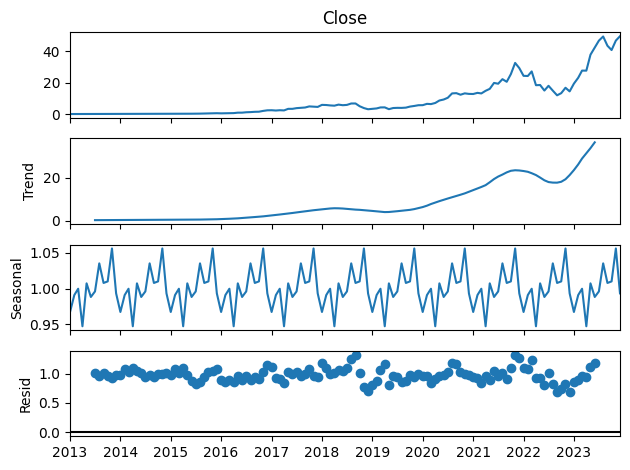

In [ ]:
# Specify the column you want to decompose ('Close' in this example)
result = seasonal_decompose(data['Close'], model='multiplicative') # Select the 'Close' column from the DataFrame
result.plot()
pyplot.show()

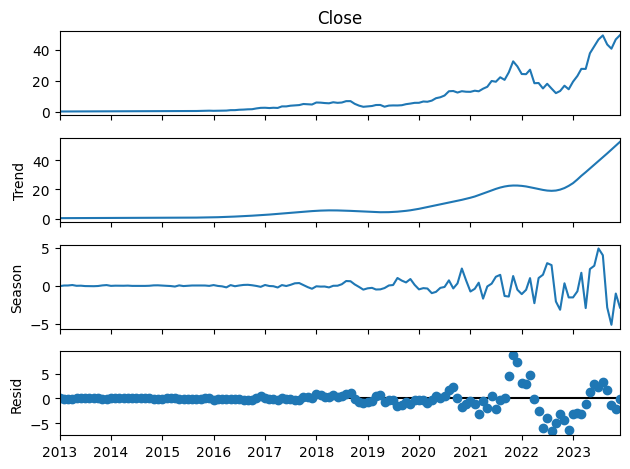

In [ ]:
from statsmodels.tsa.seasonal import STL

# Select the 'Close' column as the input for STL
stl = STL(data['Close']) # Use the 'Close' column from your DataFrame.
res = stl.fit()
fig = res.plot()

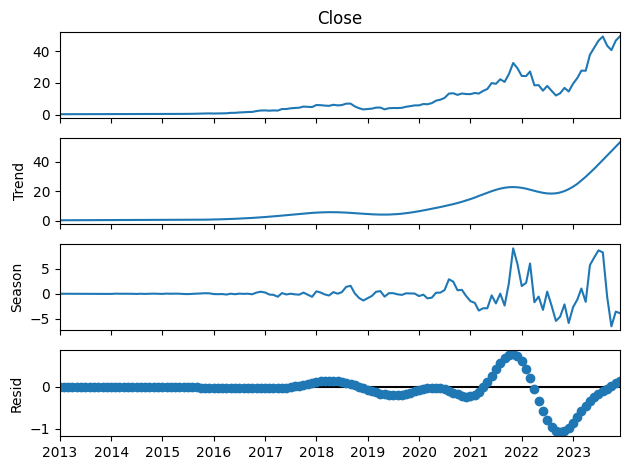

In [ ]:
stl = STL(data['Close'], seasonal=3, trend = 13) # Select the 'Close' column from your DataFrame
res = stl.fit()
fig = res.plot()


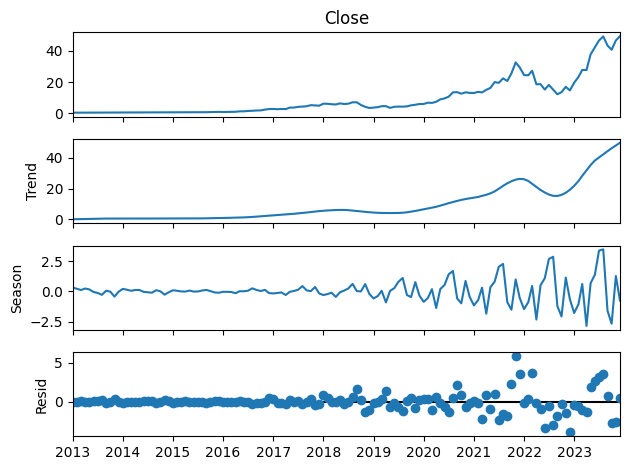

In [ ]:

stl = STL(data['Close'], seasonal=13, trend = 13) # Select the 'Close' column from your DataFrame as input
res = stl.fit()
fig = res.plot()

In [ ]:

data.describe()

,Close,year,month
count,132.000000,132.000000,132.000000
mean,9.353348,2018.000000,6.500000
std,11.931085,3.174324,3.465203
min,0.282944,2013.000000,1.000000
25%,0.667086,2015.000000,3.750000
50%,4.438351,2018.000000,6.500000
75%,13.486945,2021.000000,9.250000
max,49.511257,2023.000000,12.000000


In [ ]:

data.skew()

,0
Close,1.780872
year,0.000000
month,0.000000


In [ ]:
data.kurtosis()


,0
Close,2.700846
year,-1.220636
month,-1.217294


Para una regresión lineal (simple o multivariable), necesitas diferentes variables que determinen la función objetivo.

Piensa y determina que variables afectan tu serie de tiempo objetivo.

¿Por qué estas variables afectan tu variable objetivo?
¿De dónde sacas tus datos?
¿Los datos empalman en rango de tiempo y periodicidad (diarios/mes)?

Tasa de Interés de la Reserva Federal
Por qué afecta: Las tasas de interés influyen en el costo del capital y, por ende, en las decisiones de inversión de las empresas tecnológicas como Nvidia. Tasas más altas pueden reducir la inversión en tecnología, afectando negativamente a las acciones.
Fuente de datos: Reserva Federal de EE.UU., FRED Economic Data.

Definición del problema

A menudo, ésta es la parte más difícil de pronosticar. Definir cuidadosamente el problema exige comprender cómo se utilizarán los pronósticos, quién las necesita y cómo encaja la función de pronósticos en la organización que las necesita. Un pronosticador debe dedicar tiempo a hablar con todas las personas que intervendrán en la recogida de datos, el mantenimiento de las bases de datos y la utilización de los pronósticos para la planificación futura.



Para la serie de tiempo que utilizarás en clase, investiga el contexto histórico y social. Investiga los periodos atípicos, la tendencia, qué le afecta (variable exógena) o a qué afecta (variable endógena). Utiliza investigaciones pasadas y periódicos, noticias. Por que es importante pronosticar y para quien.

Contexto

Nvidia Corporation es una de las principales empresas de tecnología que se especializa en la fabricación de unidades de procesamiento gráfico (GPUs) y tecnologías relacionadas con la inteligencia artificial (IA). Fundada en 1993, Nvidia ha desempeñado un papel crucial en la evolución de los gráficos por computadora, los videojuegos y la computación de alto rendimiento.

En los últimos años, Nvidia ha expandido su alcance más allá de los videojuegos, incursionando en áreas como la inteligencia artificial, los centros de datos y la computación en la nube.

Periodos Atípicos

2008-2009 (Crisis Financiera Global): Durante esta época, los mercados financieros globales colapsaron, y muchas empresas, incluidas las tecnológicas, vieron caídas significativas en el valor de sus acciones.


2020 (Pandemia de COVID-19): El inicio de la pandemia provocó una gran volatilidad en los mercados financieros. No obstante, Nvidia experimentó un aumento en la demanda de GPUs debido al incremento en el gaming, el teletrabajo y la necesidad de infraestructuras de centros de datos.


2021-2022 (Escasez de Semiconductores): La escasez global de semiconductores afectó a muchas industrias, pero Nvidia logró beneficiarse debido a la alta demanda de sus productos en un entorno de suministro limitado.


3. Tendencia
La tendencia general del precio de las acciones de Nvidia ha sido alcista, especialmente en la última década, impulsada por su liderazgo en tecnología de GPUs y la expansión en sectores como la IA y los centros de datos. Sin embargo, también ha habido periodos de corrección en los que el precio ha experimentado caídas.

4. Variables Exógenas (Factores que Afectan a Nvidia)
Demanda de GPUs: El crecimiento en sectores como gaming, IA, y centros de datos ha aumentado la demanda de productos de Nvidia.
Política Monetaria de la Reserva Federal: Cambios en las tasas de interés y políticas monetarias pueden afectar las inversiones en empresas tecnológicas.
Competencia (AMD, Intel): Movimientos estratégicos de competidores pueden influir en la percepción y el rendimiento de Nvidia en el mercado.
Situaciones Geopolíticas: Las tensiones comerciales, especialmente entre EE. UU. y China, han impactado la cadena de suministro y el comercio de productos tecnológicos.


5. Variables Endógenas (Impacto de Nvidia)
Impacto en la Industria de Semiconductores: El desempeño financiero de Nvidia influye en el mercado de semiconductores, ya que la empresa es un actor clave en la innovación tecnológica.
Efecto en el NASDAQ: Como parte de este índice, las fluctuaciones en las acciones de Nvidia pueden influir en el desempeño general del NASDAQ.

6. Importancia del Pronóstico
Pronosticar el precio de las acciones de Nvidia es crucial para inversores, analistas financieros y gestores de portafolio. Un pronóstico preciso puede ayudar en la toma de decisiones de inversión, estrategias de cobertura, y planificación financiera. Además, empresas que dependen de las tecnologías de Nvidia, como desarrolladores de videojuegos o compañías de inteligencia artificial, pueden beneficiarse de estas proyecciones para planificar sus adquisiciones y presupuestos.









